In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
dfFeatures = pd.read_csv('common_features_final.csv')
dfFeatures.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,IQR,sd,sfm,Q25,sp.ent,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,../audio/common_voice_en_18534851.mp3,1.653417,222.014108,51.318958,16.829330,2.590946,2.357206,0.000144,0.561122,-2756.461625,...,3663.251888,-3.327086,0.095370,NaN,1127.815114,1885.367500,1247.598150,23.589174,1004.416270,17.423055
1,../audio/common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,1.456908,1.533911,0.000169,0.601329,-1791.164835,...,2891.063764,-1.810684,0.156760,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819
2,../audio/common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,3.795021,2.017890,0.000100,0.755722,-1614.028249,...,3191.527166,-0.282858,-0.241512,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606
3,../audio/common_voice_en_19703218.mp3,3.530958,224.594040,33.974662,15.751549,1.626245,1.766607,0.000816,0.786259,-1287.487543,...,3883.665380,-3.129440,-1.297744,NaN,1137.082244,2159.956393,1681.821265,16.690934,1089.187254,16.067026
4,../audio/common_voice_en_19647089.mp3,2.592146,214.070751,35.974475,10.610504,3.511184,2.139404,0.000139,1.287711,-1704.588366,...,3270.084778,-0.087711,1.686078,NaN,912.061635,1985.724704,1641.399212,17.118389,968.750749,18.064502


In [28]:
dfFeatures['voiceID'] = dfFeatures['voiceID'].str.lstrip('../audio/')

In [29]:
dfFeatures.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,IQR,sd,sfm,Q25,sp.ent,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,common_voice_en_18534851.mp3,1.653417,222.014108,51.318958,16.829330,2.590946,2.357206,0.000144,0.561122,-2756.461625,...,3663.251888,-3.327086,0.095370,NaN,1127.815114,1885.367500,1247.598150,23.589174,1004.416270,17.423055
1,common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,1.456908,1.533911,0.000169,0.601329,-1791.164835,...,2891.063764,-1.810684,0.156760,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819
2,common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,3.795021,2.017890,0.000100,0.755722,-1614.028249,...,3191.527166,-0.282858,-0.241512,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606
3,common_voice_en_19703218.mp3,3.530958,224.594040,33.974662,15.751549,1.626245,1.766607,0.000816,0.786259,-1287.487543,...,3883.665380,-3.129440,-1.297744,NaN,1137.082244,2159.956393,1681.821265,16.690934,1089.187254,16.067026
4,common_voice_en_19647089.mp3,2.592146,214.070751,35.974475,10.610504,3.511184,2.139404,0.000139,1.287711,-1704.588366,...,3270.084778,-0.087711,1.686078,NaN,912.061635,1985.724704,1641.399212,17.118389,968.750749,18.064502


In [30]:
dfLabel = pd.read_csv('filtered_data_labeled.tsv', sep='\t')
dfLabel.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,label
0,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687170.mp3,He associated with the Formists.,2,1,fifties,female,us,3
1,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687171.mp3,"The ""ultra accelerator"" injection gives Derric...",2,1,fifties,female,us,3
2,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687172.mp3,"Despite running as a joke, candidates have won...",2,0,fifties,female,us,3
3,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687173.mp3,Stoner also guest-starred in the television dr...,2,0,fifties,female,us,3
4,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687174.mp3,Rainelle was named for the Raine family.,2,0,fifties,female,us,3


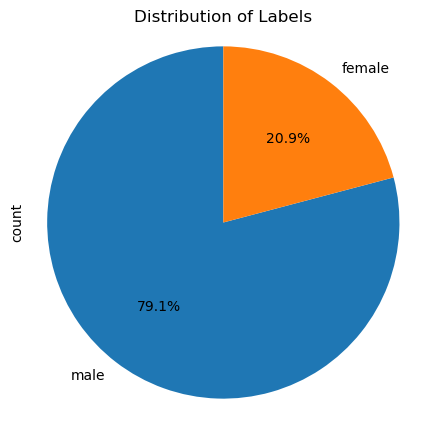

In [31]:
dfLabel["gender"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

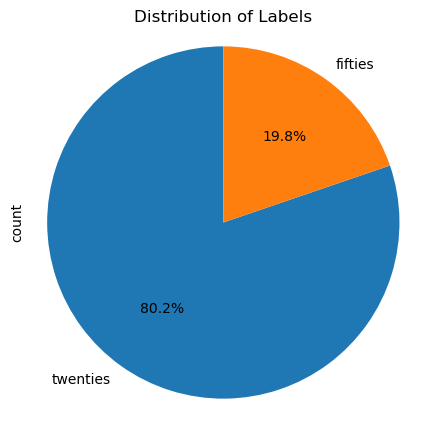

In [32]:
dfLabel["age"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

In [33]:
# Merge the two data frames on the condition that dfFeatures['voiceID'] == dfLabel['path']
df = pd.merge(dfFeatures, dfLabel[['path', 'age', 'gender']], left_on='voiceID', right_on='path', how='inner')

# Drop the 'path' column if it's no longer needed
df = df.drop(columns=['path'])

# Display the merged data frame
df.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,IQR,sd,sfm,Q25,sp.ent,...,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,age,gender
0,common_voice_en_18534851.mp3,1.653417,222.014108,51.318958,16.829330,2.590946,2.357206,0.000144,0.561122,-2756.461625,...,0.095370,NaN,1127.815114,1885.367500,1247.598150,23.589174,1004.416270,17.423055,twenties,female
1,common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,1.456908,1.533911,0.000169,0.601329,-1791.164835,...,0.156760,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819,twenties,female
2,common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,3.795021,2.017890,0.000100,0.755722,-1614.028249,...,-0.241512,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606,fifties,female
3,common_voice_en_19703218.mp3,3.530958,224.594040,33.974662,15.751549,1.626245,1.766607,0.000816,0.786259,-1287.487543,...,-1.297744,NaN,1137.082244,2159.956393,1681.821265,16.690934,1089.187254,16.067026,twenties,female
4,common_voice_en_19647089.mp3,2.592146,214.070751,35.974475,10.610504,3.511184,2.139404,0.000139,1.287711,-1704.588366,...,1.686078,NaN,912.061635,1985.724704,1641.399212,17.118389,968.750749,18.064502,twenties,female


In [34]:
print(df.shape[1] - 3)

38


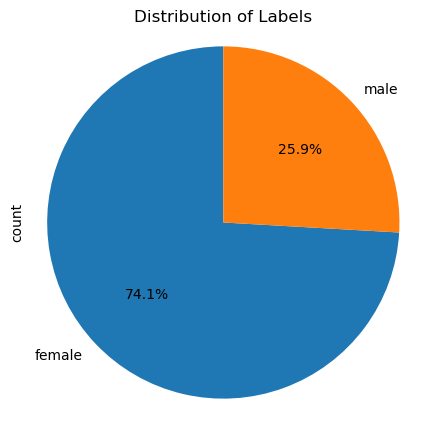

In [35]:
df["gender"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

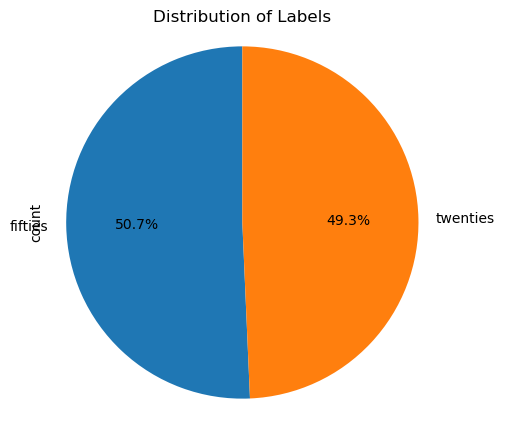

In [36]:
df["age"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

In [37]:
features = df.columns.tolist()[1:-2]

In [38]:
features_csv_path = '../CSVs/general_0.csv'
labels_tsv_path = 'filtered_data_labeled.tsv'
dfFeatures = pd.read_csv(features_csv_path)
dfFeatures['voiceID'] = dfFeatures['voiceID'].str.lstrip('../audio/')
dfLabel = pd.read_csv(labels_tsv_path, sep='\t')
# Merge the two data frames on the condition that dfFeatures['voiceID'] == dfLabel['path']
df = pd.merge(dfFeatures, dfLabel[['path', 'age', 'gender']], left_on='voiceID', right_on='path', how='inner')
# Drop the 'path' column if it's no longer needed
df = df.drop(columns=['path'])

In [39]:
dfFeatures.head()

,voiceID,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,...,p75_4,p75_5,p75_6,p75_7,p75_8,p75_9,p75_10,p75_11,p75_12,p75_13
0,common_voice_en_18534851.mp3,-452.908850,79.703054,16.737953,39.458040,10.774179,9.634709,-10.381190,3.033075,-1.116411,...,66.375494,45.994584,30.861605,18.305820,13.241439,13.663253,2.076972,3.283524,0.916775,1.314072
1,common_voice_en_19721473.mp3,-478.760426,92.547216,-1.147195,15.013859,12.810394,-3.989777,-1.823979,-11.977222,-8.890791,...,45.671132,38.049267,19.762099,10.179752,6.009402,5.165673,7.235830,-5.312409,-0.373611,2.198703
2,common_voice_en_19065733.mp3,-491.319740,85.019214,-7.719392,34.851068,14.889884,-4.218470,-2.915672,-27.805306,-15.469883,...,75.174341,48.988191,20.188471,24.730258,-6.400377,-0.317396,22.855421,6.414046,2.219999,3.460983
3,common_voice_en_19703218.mp3,-496.886185,110.027791,5.047578,17.850956,20.367252,-7.018668,-2.303655,0.375339,-6.877911,...,50.233709,54.371817,14.567134,24.736819,17.477118,10.040915,11.556863,4.145999,-1.844602,5.945735
4,common_voice_en_19647089.mp3,-469.238284,110.695170,-18.204026,40.527906,15.730208,-16.074746,-16.889740,-30.604133,-5.881211,...,87.513476,59.854498,4.799256,22.345168,-9.034324,4.090147,17.495262,0.595963,9.490500,2.665034


In [40]:
df.head()

,voiceID,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,...,p75_6,p75_7,p75_8,p75_9,p75_10,p75_11,p75_12,p75_13,age,gender
0,common_voice_en_18534851.mp3,-452.908850,79.703054,16.737953,39.458040,10.774179,9.634709,-10.381190,3.033075,-1.116411,...,30.861605,18.305820,13.241439,13.663253,2.076972,3.283524,0.916775,1.314072,twenties,female
1,common_voice_en_19721473.mp3,-478.760426,92.547216,-1.147195,15.013859,12.810394,-3.989777,-1.823979,-11.977222,-8.890791,...,19.762099,10.179752,6.009402,5.165673,7.235830,-5.312409,-0.373611,2.198703,twenties,female
2,common_voice_en_19065733.mp3,-491.319740,85.019214,-7.719392,34.851068,14.889884,-4.218470,-2.915672,-27.805306,-15.469883,...,20.188471,24.730258,-6.400377,-0.317396,22.855421,6.414046,2.219999,3.460983,fifties,female
3,common_voice_en_19703218.mp3,-496.886185,110.027791,5.047578,17.850956,20.367252,-7.018668,-2.303655,0.375339,-6.877911,...,14.567134,24.736819,17.477118,10.040915,11.556863,4.145999,-1.844602,5.945735,twenties,female
4,common_voice_en_19647089.mp3,-469.238284,110.695170,-18.204026,40.527906,15.730208,-16.074746,-16.889740,-30.604133,-5.881211,...,4.799256,22.345168,-9.034324,4.090147,17.495262,0.595963,9.490500,2.665034,twenties,female


In [41]:
def features_histograms(features_csv_path, ncols=3, labels_tsv_path='filtered_data_labeled.tsv'):
    dfFeatures = pd.read_csv(features_csv_path)
    dfFeatures['voiceID'] = dfFeatures['voiceID'].str.lstrip('../audio/')
    dfLabel = pd.read_csv(labels_tsv_path, sep='\t')
    # Merge the two data frames on the condition that dfFeatures['voiceID'] == dfLabel['path']
    df = pd.merge(dfFeatures, dfLabel[['path', 'age', 'gender']], left_on='voiceID', right_on='path', how='inner')
    # Drop the 'path' column if it's no longer needed
    df = df.drop(columns=['path'])

    # Number of rows and columns for subplots
    num_features = df.shape[1] - 3
    nrows = (num_features + ncols - 1) // ncols  # Calculate the number of rows needed

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    features = df.columns[1:-2]

    # Plot each feature in a separate subplot
    for i, feature in enumerate(features):
        try:
            ax = axes[i]
            ax.hist(df[df['age'] == 'fifties'][feature], bins=30, color='green', alpha=0.7, label='Fifties')
            ax.hist(df[df['age'] == 'twenties'][feature], bins=30, color='blue', alpha=0.7, label='Twenties')
            ax.set_title(f'Histogram of {feature} by Age')
            ax.set_xlabel(feature)
            ax.set_ylabel('Frequency')
            ax.legend()
            ax.grid(axis='y', alpha=0.75)
        except:
            continue
        
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

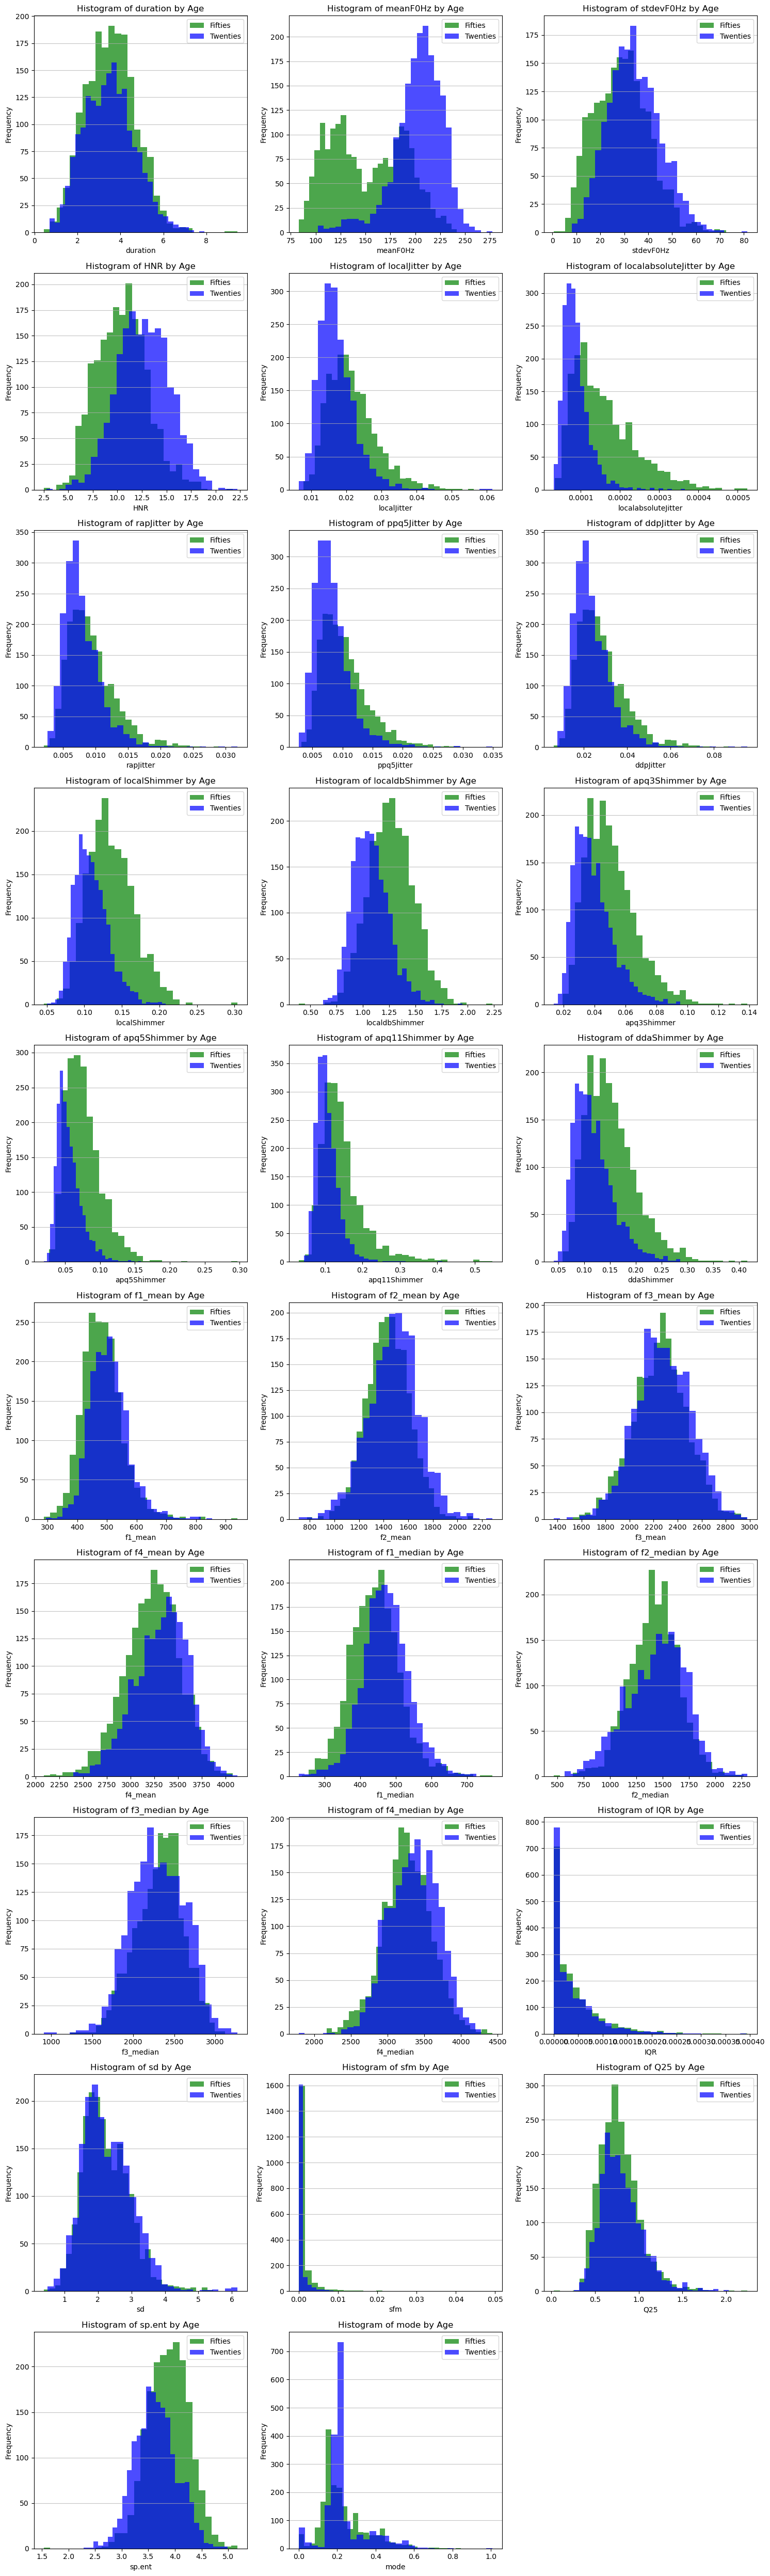

In [42]:
features_histograms('../CSVs/gender_0.csv')

In [ ]:
features_histograms('../CSVs/general_0.csv')

In [ ]:
features_histograms('../CSVs/general_1.csv')